In [1]:
#This Chapter focuses on Artificial Neural Networks in Keras.
#We'll look at some of the first ANNs and build up to multilayer perceptrons
#Following this, we'll implement these techniques using Keras.

#The perceptron is one of the simplest ANN architectures
#The book explains how it works...

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, (2,3)] #petal length, petal width
y = (iris.target == 0).astype(int) #is this iris setosa

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

y_pred


array([0])

In [2]:
import matplotlib.pyplot as plt

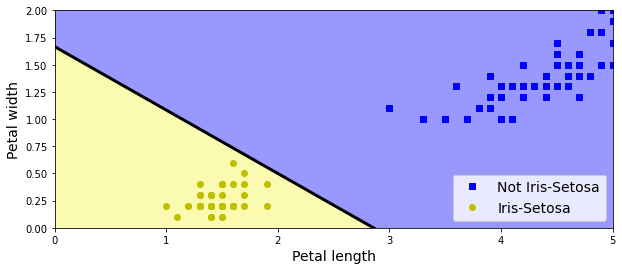

In [4]:
#Perceptron predicts false. plot this out

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()


In [5]:
#Perceptrons and their learning algorithm work quite similarly to stochastic gradient descent

#There are some problems which can't be solved by perceptrons.
#However, layering multiple perceptrons can solve many of these issues.

#training MLPs is possible through a technique called backpropagation

#A summary of the backpropagation algorithm:
#----Take one mini batch containing _ instances at a time. Goes through the full training set multiple times (epochs)
#----mini-batch passed to input layer, then to first hidden layer.
#----the result from all the neurons in the first layer is calculated, then passed on to the next layer
#----carry on until we receive the output from the final layer. All results from neurons are preserved in the forward pass
#----the algorithm now measures the network's output error
#----now it computes the contribution of each output connection to the error
#----the algortihm calculates how much of this error came from each connection in the layer below until it reaches input
#----all connections have their error gradient measured with this method
#----now a gradient descent step is applied to tweak the weights of each connection in the network

#It is important to initialize the weights randomly or else all neurons will be identical

In [6]:
#Now we can look at Regression using MLPs

#First, we need 1 output neuron per output dimension
#normally, we don't want any activation function for the regression output.
#If you want to make sure it's positive, you can use relu.
#the loss function is normally mse, but can use mean abs error if there are lots of outliers
#Huber loss is a combination of both

#typical regression architecture
#-#input neuron: one per input feature
#-#hidden layers: 1-5
#-#neurons per HL: 10-100
#-#output neurons: 1 per prediction dimension
#-Hidden Activation: ReLU
#-Output Activation: None/ReLU if +ve/tanh if bounded
#-loss: MSE or MAE/Huber

In [7]:
#On to classification

#typical architecture for a classification problem:
#input and hidden layers: same as regression
#output neurons: 1 for binary classification, 1 per label in multilabel binary, 1 per class in multiclass
#output layer activation: logistic, softmax for multiclass
#loss function: cross entropy

In [8]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.9.1'

In [9]:
keras.__version__


'2.9.0'

In [10]:
#time to build a simple image classifier

#load a data set. Use fashion from MNIST.

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()



In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
#data is already split into training/test, but create a validation data set too.
#also scale the test data

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

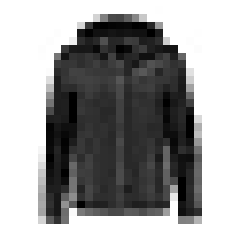

In [13]:
#pick an image and display it

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

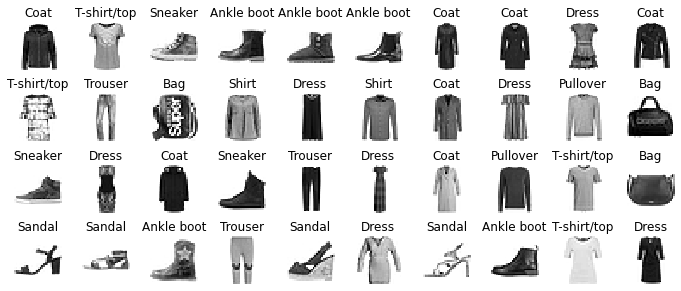

In [15]:
#plot our some of our data

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[int(y_train[index])], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [16]:
#Now add some layers to our NN
#This is a classification MLP with 2 hidden layers

#the first line creates a sequential model

#next, our first layer is a flatten layer. It converts each image into a 1d array
#ie for any input data X, it computes X.reshape(-1,1)

#The next layer is a dense hidden layer with 300 neurons using ReLU activation.
#A second dense layer with 100 neurons next.
#Finally a dense output layer with 10 neurons, one per class. Using softmax activation because classes are exclusive

model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [17]:
#instead of defining a model like this, we can pass a list when creating the sequential model.

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
#We can see from the summary that dense layers have a lot of parameters
#The first hidden layer has 784*300 connection weights plus 300 bias terms
#We run the risk of overfitting with too many neurons

model.layers

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [24]:
model.get_layer('dense_3') is hidden1

True

In [25]:
#parameters of a layer can be accessed using its get_weights() and set_weights() methods.
#this includes both connection weights and bias terms

weights, biases = hidden1.get_weights()
weights

array([[ 0.03711809, -0.05667525, -0.00019884, ...,  0.0125111 ,
         0.00813701, -0.04239006],
       [-0.0332147 ,  0.01504715,  0.02650711, ..., -0.00255322,
         0.03278475,  0.06799453],
       [-0.02402087, -0.04862504, -0.03338174, ..., -0.05547561,
        -0.02058109,  0.00398877],
       ...,
       [ 0.0113083 ,  0.00145676, -0.05789073, ...,  0.0335641 ,
         0.07438171,  0.05840358],
       [-0.00960778,  0.00730684,  0.04936979, ...,  0.02185319,
         0.00541496,  0.02102282],
       [-0.01679042, -0.06937489, -0.04232713, ...,  0.06996213,
        -0.00542641,  0.07317241]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases.shape

(300,)

In [28]:
#As mentioned before, the dense layer has initialized its weight randomly.
#can manually influence initialization using kernel_intializer

#Once we have created the model, we need to compile it to specify the loss function and optimizer to use.

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [29]:
#We used sparse_categorical_crossentropy because we have sparse labels and the classes are exclusive
#if we had one hot vectors for our target probability classes, we use categorical_crossentropy
#if we were doing binary classification, we would use sigmoid activation and use binary crossentropy.

#converting sparse to one hot labels can be done using keras.utils.to_categorical()

#specifying SGD means the backpropagation algorithm will run as described above.

#now we can train the model

history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7137 - accuracy: 0.7685 - val_loss: 0.5188 - val_accuracy: 0.8314
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4838 - accuracy: 0.8324 - val_loss: 0.4507 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4391 - accuracy: 0.8463 - val_loss: 0.4109 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4132 - accuracy: 0.8552 - val_loss: 0.3983 - val_accuracy: 0.8672
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3929 - accuracy: 0.8626 - val_loss: 0.3843 - val_accuracy: 0.8628
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3788 - accuracy: 0.8664 - val_loss: 0.3737 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3643 - accuracy: 0.8714 - val_loss: 0.4194 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

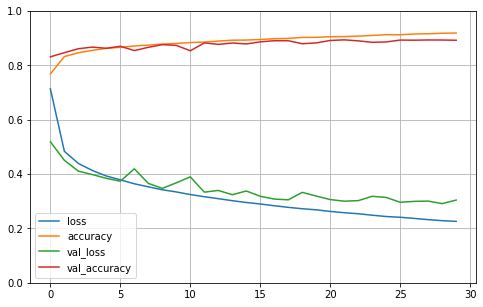

In [33]:
#instead of passing a validation set, we can use validation_split tp assess accuracy

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show

In [34]:
#check accuracy on the test set before deployment

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3425 - accuracy: 0.8785


[0.3424665629863739, 0.8784999847412109]

In [35]:
#we can use predict to find the models prediction on new instances

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 226ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

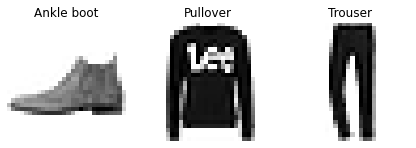

In [38]:
#here we get a probability for each of the classes. 

#check our objects

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [3]:
#This is a classifier using the sequential API
#next, we can look at a regression MLP

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
#import and split housing data

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [5]:
#scale all the data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
#single neuron output layer because only one output value
#single hidden layer with fewer neurons to avoid overfitting - this data set is quite noisy

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [11]:
model.compile(loss='mean_squared_error', optimizer='sgd')

In [12]:
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.8474 - val_loss: 0.5450
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5698 - val_loss: 0.5128
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4904 - val_loss: 0.4831
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4607 - val_loss: 0.4816
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4565 - val_loss: 0.4739
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4548 - val_loss: 0.4637
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4701 - val_loss: 0.4570
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4468 - val_loss: 0.4506
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4323 - val_loss: 0.4452
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4235 - val_loss: 0.4382

In [13]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3824


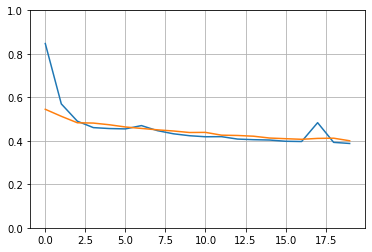

In [17]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 46ms/step


array([[1.7485635],
       [1.5952846],
       [2.5719607]], dtype=float32)

In [18]:
#this was the sequential API, next we will use the functional API
#for this, let's build a wide and deep network. This can learn both simple rules and deep patterns

#in the code below
#first create the input object and specify the shape and dtype
#a dense layer with 30 neurons with relu activation. It's called like a function and passed the input
#the second layer is again used as a function with the output of the first layer being passed in
#the concatenate layer creates a concat function and calls the inputs
#output layer has no activation and takes the concat as input

#steps after this are the same as above

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden1])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

In [19]:
#what if we want to send some features down the wide path and some down the deep path?
#create two inputs, one for 5 features and the deep path takes 6

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A,input_B], outputs=[output])

In [21]:
#when calling the fit method on this model, we must pick two inputs

model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [22]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)

y_pred = model.predict((X_new_A, X_new_B))                  
                

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 2.4547 - val_loss: 1.0498
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.9172 - val_loss: 0.8153
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7517 - val_loss: 0.7370
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6916 - val_loss: 0.6954
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6561 - val_loss: 0.6666
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6311 - val_loss: 0.6433
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6102 - val_loss: 0.6246
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5941 - val_loss: 0.6098
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5807 - val_loss: 0.5979
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5689 - val_loss: 0.5873

In [23]:
#cases where you may want multiple outputs include
#the location and classification of an object in an image
#multiclass classification eg to see a persons expression and whether they are wearing glasses
#as a regularization technique to determine that the deep part of your network is learning something

#the last point, example below

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [24]:
#each output has it's own loss, so we should see a list of losses when compiled

model.compile(loss=['mse', 'mse'], loss_weights=[0.9,0.1], optimizer='sgd')

In [25]:
#the auxillary and main output will try to predict the same thing, so we can pass y_train to both

history = model.fit([X_train_A, X_train_B], [y_train, y_train],
                   epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 1.0529 - main_output_loss: 0.9119 - aux_output_loss: 2.3218 - val_loss: 0.6902 - val_main_output_loss: 0.6101 - val_aux_output_loss: 1.4105
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6634 - main_output_loss: 0.5911 - aux_output_loss: 1.3138 - val_loss: 0.6122 - val_main_output_loss: 0.5429 - val_aux_output_loss: 1.2364
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5651 - main_output_loss: 0.5044 - aux_output_loss: 1.1115 - val_loss: 0.5725 - val_main_output_loss: 0.5120 - val_aux_output_loss: 1.1170
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5452 - main_output_loss: 0.4933 - aux_output_loss: 1.0124 - val_loss: 0.5430 - val_main_output_loss: 0.4902 - val_aux_output_loss: 1.0174
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6342 - main_output_loss: 0.5963 - aux_output_loss: 0.9752 - val_loss

In [26]:
#when evaluating the model, keras shows the total loss as well as the loss per output

total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 1s 3ms/step - loss: 0.3818 - main_output_loss: 0.3640 - aux_output_loss: 0.5427


In [27]:
#similar for predict

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 135ms/step


In [28]:
#we can also use the subclassing API to build a model
#the model we just built can be done as so:

class WideAndDeep(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeep()

In [33]:
#with functional and sequential APIs, we can save and load a model as follows

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.4762 - val_loss: 0.9342
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.8309 - val_loss: 0.8059
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7534 - val_loss: 0.7496
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7038 - val_loss: 0.7066
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6665 - val_loss: 0.6733
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6367 - val_loss: 0.6486
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6124 - val_loss: 0.6259
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5926 - val_loss: 0.6083
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5753 - val_loss: 0.5915
Epoch 10/10
162/162 [==============================] - 0s 3ms/step - loss: 0.5568


In [34]:
model.save('first_keras.h5')
model = keras.models.load_model('first_keras.h5')

In [35]:
#we can tell the fit method to save checkpoints using callbacks
#defaults to end of each epoch

checkpoint_cb = keras.callbacks.ModelCheckpoint('first_keras.h5')
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5489
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5378
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5284
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5197
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5123
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5052
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4990
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4934
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4882
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4831


In [36]:
#We can use early stopping and only save the best model

checkpoint_cb = keras.callbacks.ModelCheckpoint('first_keras.h5',
                                               save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

model = keras.models.load_model('first_keras.h5') #this rolls back to the best model

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4789 - val_loss: 0.4979
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4746 - val_loss: 0.4951
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4709 - val_loss: 0.4889
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4674 - val_loss: 0.4852
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4642 - val_loss: 0.4819
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4606 - val_loss: 0.4785
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4581 - val_loss: 0.4756
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4549 - val_loss: 0.4736
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4521 - val_loss: 0.4704
Epoch 10/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4493 - val_loss: 0.4688

In [37]:
#equally, the early stopping callback will stop training once no progress is made after a number of epochs

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4467 - val_loss: 0.4654
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4445 - val_loss: 0.4638
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4426 - val_loss: 0.4609
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4400 - val_loss: 0.4594
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4385 - val_loss: 0.4567
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4364 - val_loss: 0.4554
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4345 - val_loss: 0.4545
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4330 - val_loss: 0.4510
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4311 - val_loss: 0.4518
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4291 - val_lo

In [38]:
#it is possible to define our own callbacks as well.

#but now, let's look at tensorboard
#Tensorboard is a viz tool allowing us to view training curves, compare runs, stats etc...

#data input to tensorboard must be in event files
#start by defining the root log directory for Tensorboard logs

import os
root_logdir = os.path.join(os.curdir, 'my_logs')

In [39]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()


In [40]:
#the tensorboard callback below will now create the log directory, create event files and write summaries

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.3546 - val_loss: 0.3784
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3542 - val_loss: 0.3795
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3541 - val_loss: 0.3789
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3533 - val_loss: 0.3798
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3532 - val_loss: 0.3775
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3529 - val_loss: 0.3764
Epoch 7/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3520 - val_loss: 0.3753
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3514 - val_loss: 0.3766
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3513 - val_loss: 0.3758
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3507 - val_loss: 0.3745

In [41]:
#load tensorboard from jupyter

%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [42]:
#we can create a summary writer which logs scalers, histograms, images, audio, text and can all be visualied in TB

test_logdir = get_run_logdir()

writer = tf.summary.create_file_writer(test_logdir)

with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scaler('my_scaler', np.sin(step/10), step=step)
        data = (np.random.randn(100) + 2)*step / 100
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2,32,32,3)
        tf.summary.image('my_images', images*step / 1000, step=step)
        texts = ['the step is ' + str(step), 'its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000)/48000*2*np.pi*step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', sample_rate=48000, step=step)

AttributeError: module 'tensorboard.summary._tf.summary' has no attribute 'scaler'

In [71]:
#Now for fine-tuning our hyperparameters

#to use GridSearch or RandomizedSearch, we need to wrap keras models in objects that mimic scikit learn regressors

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [72]:
import scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor

keras_reg = scikeras.wrappers.KerasRegressor(build_model)

In [55]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)

y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 1.2988 - val_loss: 0.7611
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6902 - val_loss: 0.6829
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6223 - val_loss: 0.6184
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5749 - val_loss: 0.5789
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5428 - val_loss: 0.5528
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5217 - val_loss: 0.5322
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5080 - val_loss: 0.5216
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4954 - val_loss: 0.5111
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4909 - val_loss: 0.5039
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4789 - val_lo

In [74]:
#try using randomized search to explore number of neurons, hidden layers, and learning rate

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: Invalid parameter n_neurons for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(n_neurons=70)`
Check the list of available parameters with `estimator.get_params().keys()`

In [76]:
keras_reg.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs'])

In [ ]:
#some issue casued by scikeras change.... help needed. ask stackexchange...

